In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Load dataset-train
train_df = pd.read_csv("train.csv")
train_df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [3]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            6340 non-null   int64  
 1   protein_sequence  6340 non-null   object 
 2   pH                6331 non-null   float64
 3   data_source       5930 non-null   object 
 4   tm                6339 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 247.8+ KB


,seq_id,pH,tm
count,6340.000000,6331.000000,6339.000000
mean,3169.500000,7.105434,49.178751
std,1830.344685,2.577950,11.378440
min,0.000000,2.000000,2.800000
25%,1584.750000,7.000000,43.500000
50%,3169.500000,7.000000,48.500000
75%,4754.250000,7.000000,53.100000
max,6339.000000,55.600000,97.800000


In [4]:
data = train_df.drop_duplicates(keep='first')
train_df


,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
6335,6335,MASNFIKIYLDNNATTPLDDRVKSAITDALDLWANPSSNNENALKA...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
6336,6336,MASNGDKGLIVSFGEMLIDFVPTESGVSLAEAPGFLKAPGGAPANV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
6337,6337,MASNKTTLQKMGKKQNGKSKKVEEAEPEEFVVEKVLDRRVVNGKVE...,7.0,doi.org/10.1038/s41592-020-0801-4,60.9
6338,6338,MASNLGRVARRFAAAQASALTKPKKFYKEVSVINETDESTGNQIHK...,7.0,doi.org/10.1038/s41592-020-0801-4,39.2


In [6]:
duplicate_rows = train_df[train_df.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [seq_id, protein_sequence, pH, data_source, tm]
Index: []


In [5]:
duplicate_rows = train_df[train_df.duplicated(subset=['protein_sequence', 'data_source'], keep=False)]
print(duplicate_rows)

      seq_id                                   protein_sequence    pH  \
973      973  DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  48.4   
974      974  DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...   7.0   
983      983  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...   7.0   
984      984  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQAGVVFQNRESVLPT...   7.0   
986      986  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...  48.4   
...      ...                                                ...   ...   
6221    6221  MASHKLLVTPPKALLKPLSIPNQLLLGPGPSNLPPRIMAARGLQMI...   7.4   
6222    6222  MASHKLLVTPPKALLKPLSIPNQLLLGPGPSNLPPRIMAARGLQMI...   7.4   
6223    6223  MASHKLLVTPPKALLKPLSIPNQLLLGPGPSNLPPRIMAARGLQMI...   7.4   
6224    6224  MASHKLLVTPPKALLKPLSIPNQLLLGPGPSNLPPRIMAAVGLQMI...   7.4   
6225    6225  MASHKLLVTPPKALLKPLSIPNQLLLGPGPSNLPPRIMAAVGLQMI...   7.4   

                  data_source    tm  
973                       NaN   7.0  
974                       NaN  48.0  
983      

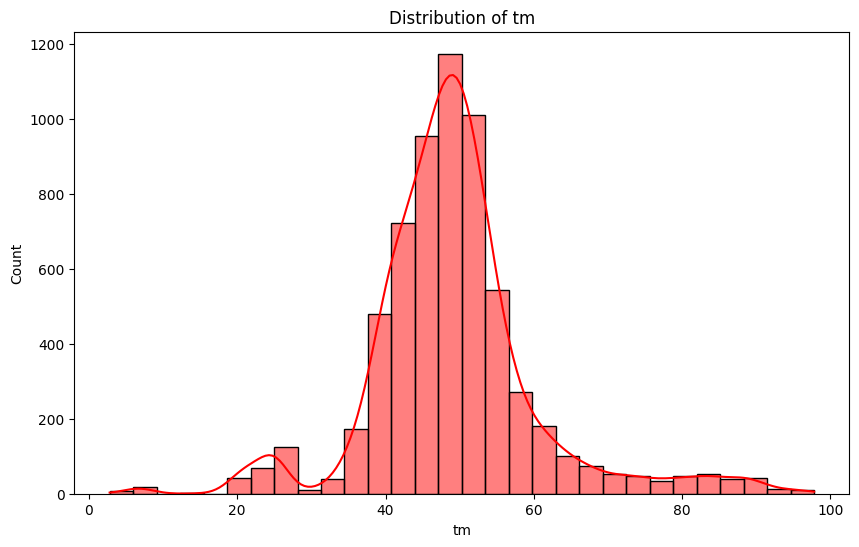

In [7]:
#Understanding the distribution of tm
plt.figure(figsize=(10,6))
sns.histplot(train_df['tm'].dropna(),bins=30 , kde = True , color ='red')
plt.title('Distribution of tm')
plt.show()

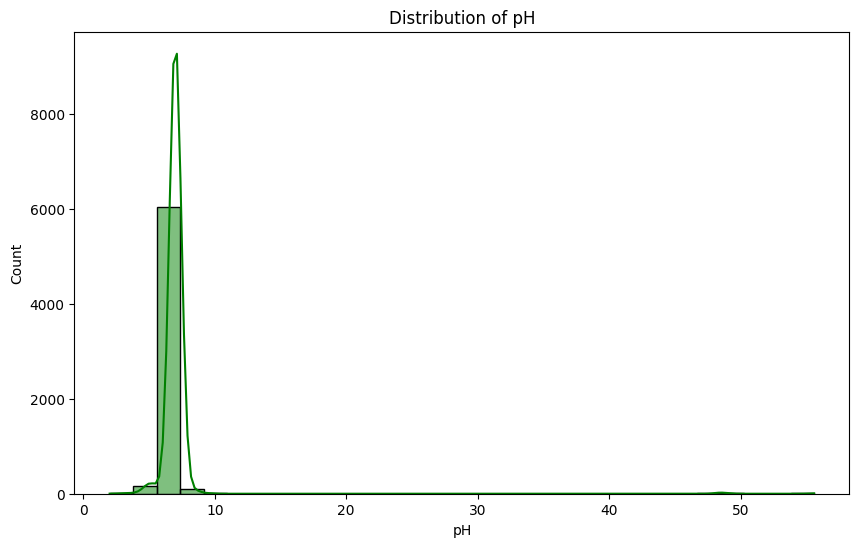

In [8]:
#Understanding the distribution of pH
plt.figure(figsize=(10,6))
sns.histplot(train_df['pH'].dropna(),bins=30 , kde = True , color ='green')
plt.title('Distribution of pH')
plt.show()

In [9]:
#calculate the count of protein_sequences
seq_count = train_df['protein_sequence'].value_counts()
print(seq_count)

protein_sequence
DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPTQSYGYYHEYTVITPGARTRGTRRIITGKATQEDYYTGDHYATFSLIDQTC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     8
MALKSLVLLSLLVLVLLLVRVQPSLGKETAAAKFERQHMDSSTSAASSSNYCNQMMKSRNLTKDRCKPVNTFVHESLADVQAVCSQKNVACKDGQTNCYQSYSTMSITDCRETGSSKYPNCAYKTTQANKHIIVACEGNPYVPVHFDASV                          

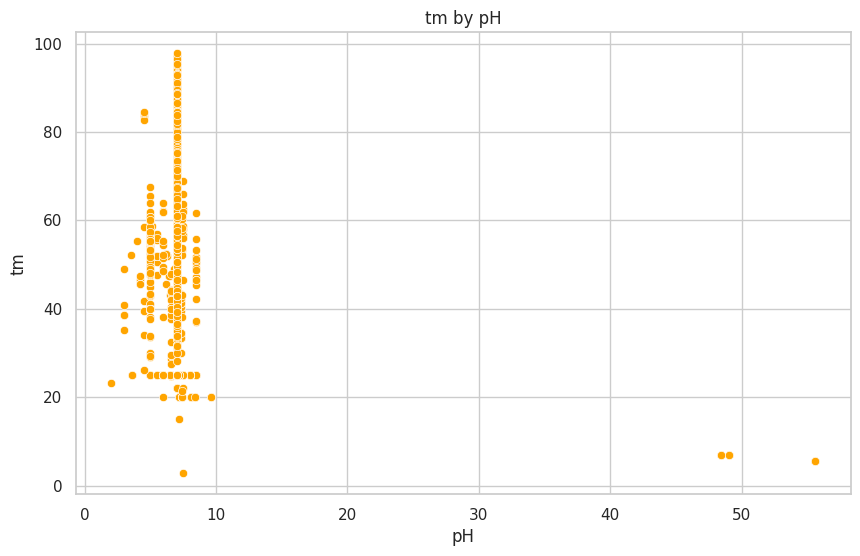

In [10]:
# tm by pH distribution
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

sns.scatterplot(y='tm', x='pH', data = train_df ,color ='orange')
plt.title('tm by pH')
plt.ylabel('tm')
plt.xlabel('pH')
plt.show()


<Axes: >

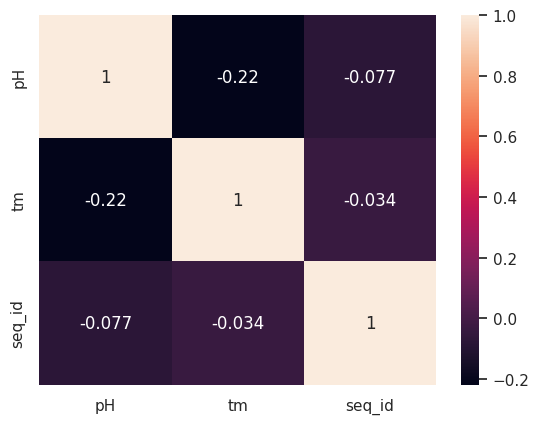

In [11]:
#Heatmap of correlation for training data
sns.heatmap(train_df[['pH','tm','seq_id']].corr(),annot=True)

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     317.5
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           2.50e-69
Time:                        15:21:41   Log-Likelihood:                -14823.
No. Observations:                6331   AIC:                         2.965e+04
Df Residuals:                    6329   BIC:                         2.966e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5495      0.141     67.838      0.0

ValueError: x and y must have same first dimension, but have shapes (6340,) and (6331,)

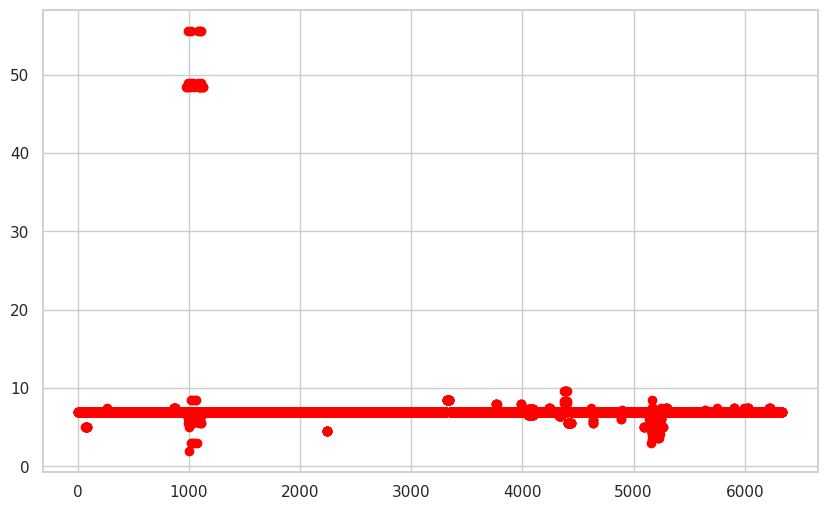

In [12]:
x_data = list(train_df['seq_id'])
y_data = list(train_df['pH'])
#importing the required library
import statsmodels.formula.api as smf
formula = 'pH ~ tm'
model = smf.ols(formula, data=train_df).fit() # Model is already fitted here

print(model.summary())

fig,ax =plt.subplots(figsize=(10,6))
ax.scatter(x_data,y_data,color='red')
legend_label = f"Regression line({formula})"

#Set the y-axis values based on the model predictions
y_predicted = model.fittedvalues # Use model directly since it's already fitted

#Now we actually plot the line
ax.plot(x_data,y_predicted,label=legend_label,color="black",linewidth=2)

In [13]:
#  calculate amino acid composition
def calculate_amino_acid_composition(sequence):
    amino_acids = set(sequence)
    total_length = len(sequence)

    composition = {
        "A": sequence.count("A") / total_length,
        "R": sequence.count("R") / total_length,
        "N": sequence.count("N") / total_length,
        "D": sequence.count("D") / total_length,
        "C": sequence.count("C") / total_length
    }

    return composition

# Apply the function to all protein sequences in the dataset
train_df['amino_acid_composition'] = train_df['protein_sequence'].apply(calculate_amino_acid_composition)

# Example: Print the amino acid composition for the first protein sequence
first_sequence_composition = train_df['amino_acid_composition'].iloc[0]
print("Amino acid composition for the first protein sequence:")
print(first_sequence_composition)

# Calculate average amino acid composition across all sequences
average_composition = pd.DataFrame(train_df['amino_acid_composition'].tolist()).mean()
print("Average amino acid composition across all sequences:")
print(average_composition)


Amino acid composition for the first protein sequence:
{'A': 0.13196480938416422, 'R': 0.07331378299120235, 'N': 0.01466275659824047, 'D': 0.03812316715542522, 'C': 0.002932551319648094}
Average amino acid composition across all sequences:
A    0.078431
R    0.052173
N    0.041015
D    0.054471
C    0.016077
dtype: float64


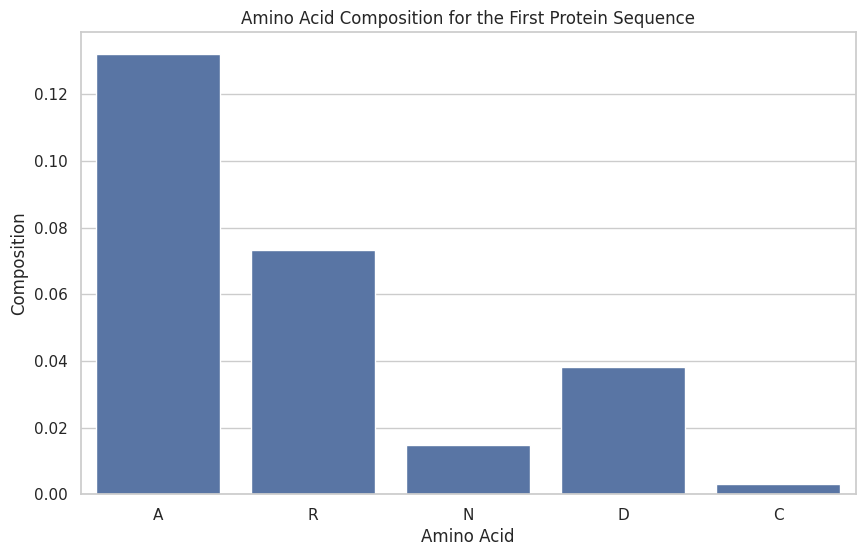

In [14]:
# Converting  the first sequence composition to a DataFrame
first_sequence_df = pd.DataFrame(list(first_sequence_composition.items()), columns=['Amino Acid', 'Composition'])

# Plot the composition of the first protein sequence
plt.figure(figsize=(10, 6))
sns.barplot(x='Amino Acid', y='Composition', data=first_sequence_df)
plt.title('Amino Acid Composition for the First Protein Sequence')
plt.xlabel('Amino Acid')
plt.ylabel('Composition')
plt.show()

In [15]:
# Import required libraries for Decision Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree





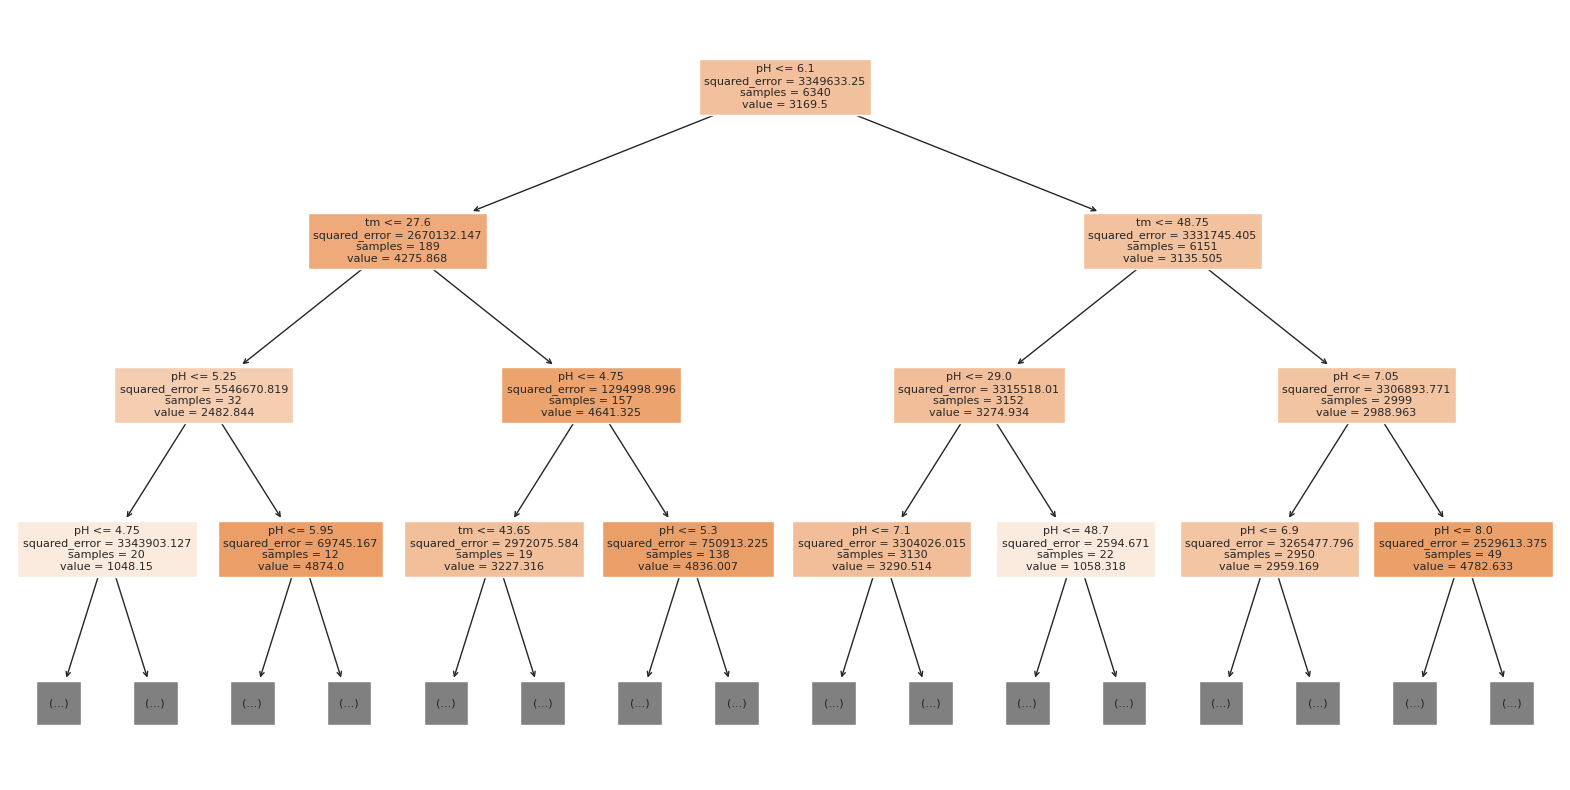

In [16]:
# Columns to explore
cols = [ 'pH', 'tm']

# Split X & Y
X = train_df[cols]
y = train_df.seq_id
X = X.fillna(X.mean())

# Fit Decision Tree
dt = DecisionTreeRegressor().fit(X,y)

# Plot DT
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, max_depth=3, fontsize=8);

In [24]:
# Create a new feature for the length of the protein sequence , already plotted above
train_df['amino_acid_composition'] = train_df['protein_sequence'].apply(len)

# Verify the new feature
print(train_df.head())

   seq_id                                   protein_sequence   pH  \
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3       3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4       4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   

                         data_source    tm  amino_acid_composition  
0  doi.org/10.1038/s41592-020-0801-4  75.7                     341  
1  doi.org/10.1038/s41592-020-0801-4  50.5                     286  
2  doi.org/10.1038/s41592-020-0801-4  40.5                     497  
3  doi.org/10.1038/s41592-020-0801-4  47.2                     265  
4  doi.org/10.1038/s41592-020-0801-4  49.5                    1451  


In [28]:
# check for null values
print('Before:\n',train_df.isnull().sum())

# replace  missing values in 'pH' with the mean value
train_df['pH'].fillna(train_df['pH'].mean(), inplace=True)

# check cleaned values
print('After:\n',train_df.isnull().sum())

Before:
 seq_id                      0
protein_sequence            0
pH                          9
data_source               410
tm                          1
amino_acid_composition      0
dtype: int64
After:
 seq_id                      0
protein_sequence            0
pH                          0
data_source               410
tm                          1
amino_acid_composition      0
dtype: int64


Modelling using Machine learning models

In [25]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numerical_features = ['pH', 'amino_acid_composition']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

# Verify the scaling
print(train_df.head())

   seq_id                                   protein_sequence        pH  \
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG... -0.040901   
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR... -0.040901   
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA... -0.040901   
3       3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL... -0.040901   
4       4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA... -0.040901   

                         data_source    tm  amino_acid_composition  
0  doi.org/10.1038/s41592-020-0801-4  75.7               -0.273727  
1  doi.org/10.1038/s41592-020-0801-4  50.5               -0.411772  
2  doi.org/10.1038/s41592-020-0801-4  40.5                0.117818  
3  doi.org/10.1038/s41592-020-0801-4  47.2               -0.464480  
4  doi.org/10.1038/s41592-020-0801-4  49.5                2.512266  


In [26]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = train_df.drop(columns=['seq_id', 'protein_sequence', 'tm'])
y = train_df['tm']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(X_train.shape, X_val.shape)

(5072, 3) (1268, 3)


Future Aspects


1.   Compare different machine learning models
2.   Use the best fitted models to train prediction models



Working with Test Data

In [17]:
import pandas as pd
df = pd.read_csv("test.csv")
df.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [23]:
data = df.drop_duplicates(keep='first')
df


,seq_id,protein_sequence,pH,data_source,tm,amino_acid_composition
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,"{'A': 0.13196480938416422, 'R': 0.073313782991..."
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,"{'A': 0.0979020979020979, 'R': 0.1048951048951..."
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,"{'A': 0.1006036217303823, 'R': 0.0623742454728..."
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,"{'A': 0.07547169811320754, 'R': 0.037735849056..."
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,"{'A': 0.059269469331495524, 'R': 0.04341833218..."
...,...,...,...,...,...,...
6335,6335,MASNFIKIYLDNNATTPLDDRVKSAITDALDLWANPSSNNENALKA...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,"{'A': 0.07772020725388601, 'R': 0.044041450777..."
6336,6336,MASNGDKGLIVSFGEMLIDFVPTESGVSLAEAPGFLKAPGGAPANV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4,"{'A': 0.10493827160493827, 'R': 0.052469135802..."
6337,6337,MASNKTTLQKMGKKQNGKSKKVEEAEPEEFVVEKVLDRRVVNGKVE...,7.0,doi.org/10.1038/s41592-020-0801-4,60.9,"{'A': 0.07142857142857142, 'R': 0.043956043956..."
6338,6338,MASNLGRVARRFAAAQASALTKPKKFYKEVSVINETDESTGNQIHK...,7.0,doi.org/10.1038/s41592-020-0801-4,39.2,"{'A': 0.09701492537313433, 'R': 0.048507462686..."


<Axes: >

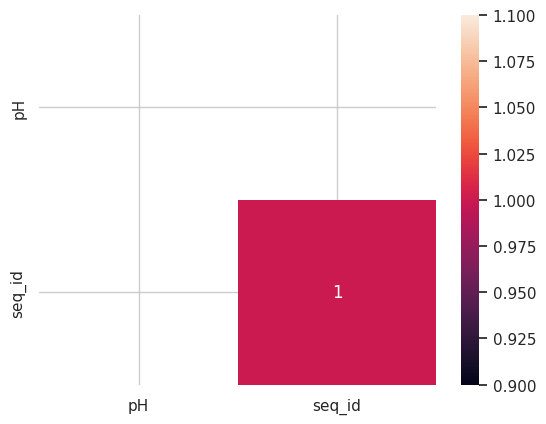

In [21]:
#Heatmap of correlation for test data
sns.heatmap(df[['pH','seq_id']].corr(),annot=True)

## Linear Regression model using Statsmodels
This analysis helps in understanding if there is a linear relationship between the protein sequence and pH. The model summary provides insights into whether the relationship is statistically significant.



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 24 Jul 2024   Prob (F-statistic):                nan
Time:                        15:50:34   Log-Likelihood:                 65323.
No. Observations:                2413   AIC:                        -1.258e+05
Df Residuals:                       0   BIC:                        -1.119e+05
Df Model:                        2412                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

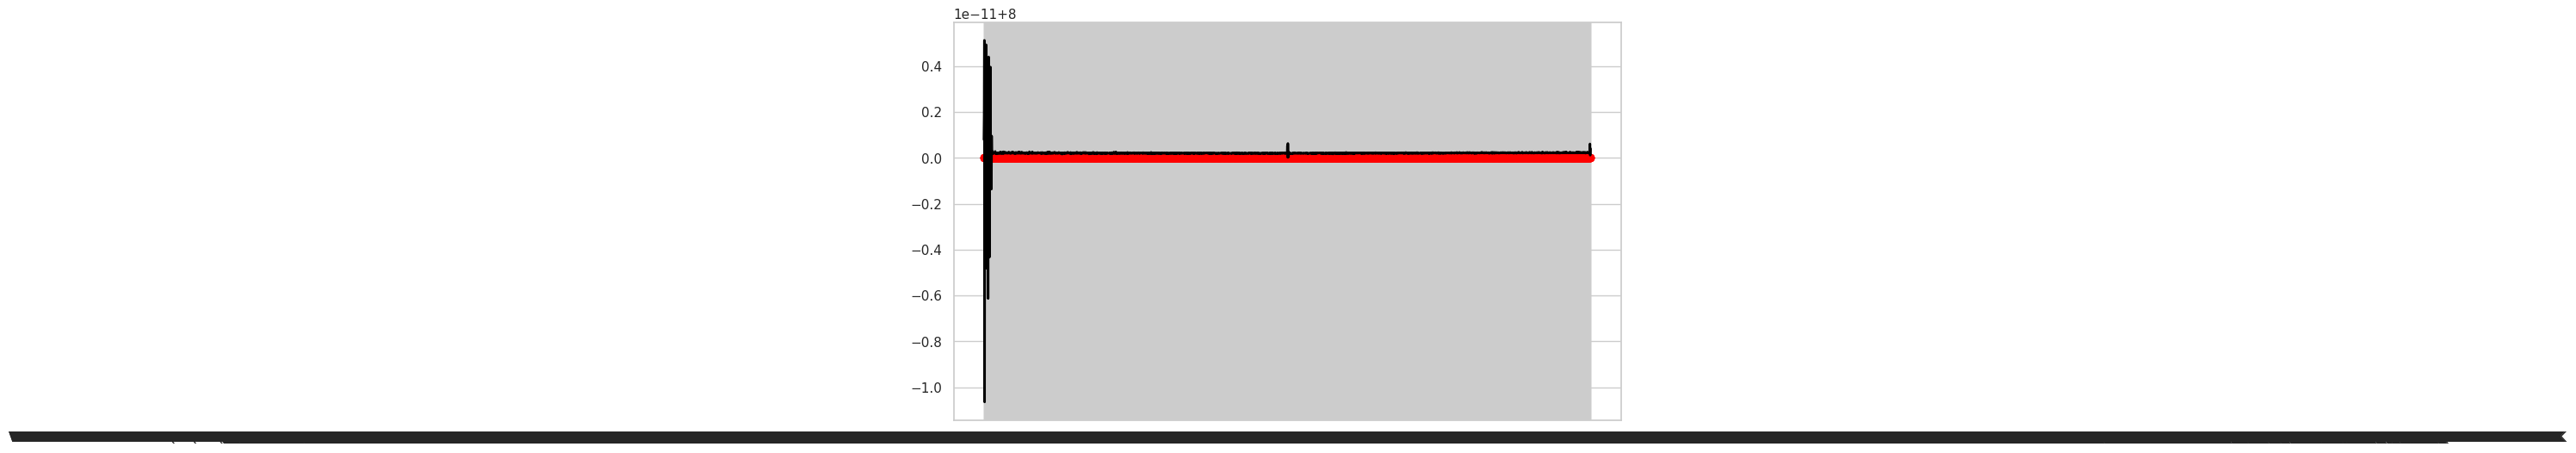

In [31]:
x_data = list(df['protein_sequence'])
y_data = list(df['pH'])
#importing the required library
import statsmodels.formula.api as smf
formula = 'pH ~ protein_sequence'
model = smf.ols(formula, data=df).fit() # Model is already fitted here

print(model.summary())

fig,ax =plt.subplots(figsize=(10,6))
ax.scatter(x_data,y_data,color='red')
legend_label = f"Regression line({formula})"

#Set the y-axis values based on the model predictions
y_predicted = model.fittedvalues # Use model directly since it's already fitted

#plot
ax.plot(x_data,y_predicted,label=legend_label,color="black",linewidth=2)

A significant p-value (< 0.05) indicates that the residuals do not follow a normal distribution. The extremely high JB statistic and a p-value of 0.00 confirm the non-normality of the residuals.
